<a href="https://colab.research.google.com/github/lari-guimaraes/Portf-lio_Machine_Learning/blob/main/Departamento_M%C3%A9dico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importação das bibliotecas e base de dados

In [ ]:
import os
import cv2 #OpenCV
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, Dense, AveragePooling2D, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
xray_directory = '/content/drive/MyDrive/Ciência de Dados para Empresas e Negócios/Departamento médico/Dataset'

In [ ]:
os.listdir(xray_directory)

['.DS_Store', '2', '3', '1', '0']

In [ ]:
image_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = image_generator.flow_from_directory(batch_size=40, directory=xray_directory,
                                                      shuffle=True, target_size=(256,256), 
                                                      class_mode='categorical', subset='training')

Found 532 images belonging to 4 classes.


In [ ]:
train_images, train_labels = next(train_generator)

In [ ]:
train_images.shape

(40, 256, 256, 3)

In [ ]:
train_labels

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]],

In [ ]:
#Covid19 - 1 0 0 0
# Normal - 0 1 0 0
# Viral - 0 0 1 0
#Bacterial - 0 0 0 1
labels_names = {0: 'Covid-19', 1:'Normal', 2:'Pneumonia viral', 3:'Pneumonia bacterial'}

## Visualização dos dados

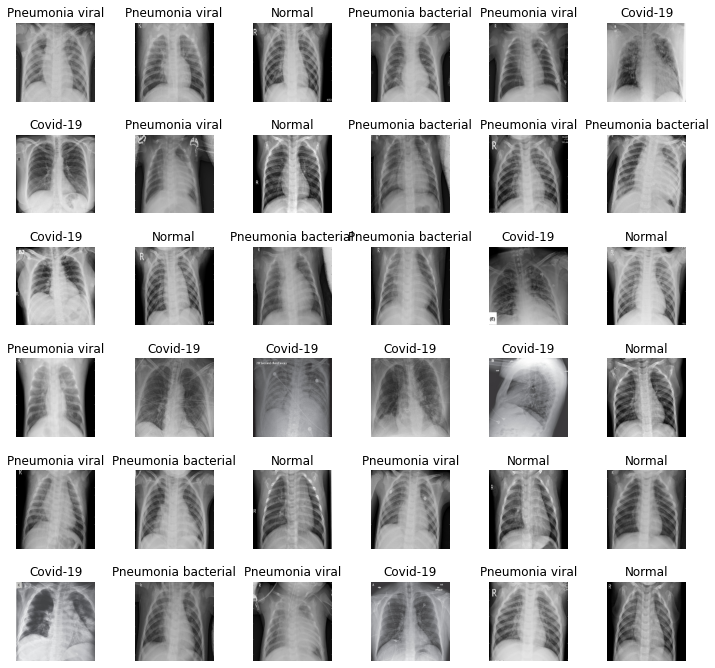

In [ ]:
fig, axes = plt.subplots(6,6, figsize = (12,12))
axes = axes.ravel()
for i in np.arange(0,36):
  axes[i].imshow(train_images[i])
  axes[i].set_title(labels_names[np.argmax(train_labels[i])])
  axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

## Carregamento da rede neural com pesos pré-treinados

In [ ]:
base_model = ResNet50(weights='imagenet',include_top=False, input_tensor = Input(shape=(256,256,3)))

In [ ]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
len(base_model.layers)

175

In [ ]:
for layer in base_model.layers[:-10]:
  layers.trainable = False

## Construção e Treinamento do modelo de deep learning

In [ ]:
head_model = base_model.output
head_model = AveragePooling2D()(head_model)
head_model = Flatten()(head_model)
head_model = Dense(256, activation='relu')(head_model)
head_model = Dropout(0.2)(head_model)
head_model = Dense(256, activation='relu')(head_model)
head_model = Dropout(0.2)(head_model)
head_model = Dense(4, activation = 'softmax')(head_model)

In [ ]:
model = tf.keras.Model(inputs=base_model.input, outputs=head_model)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4, decay=1e-6), metrics =['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
checkpointer = ModelCheckpoint(filepath='weights.hdf5')

In [ ]:
train_generator = image_generator.flow_from_directory(batch_size=4, directory=xray_directory,
                                                      shuffle=True, target_size=(256,256), 
                                                      class_mode='categorical', subset='training')

Found 532 images belonging to 4 classes.


In [ ]:
history = model.fit_generator(train_generator, epochs=25, callbacks=[checkpointer])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/25
133/133 [==============================] - 658s 5s/step - loss: 0.8174 - accuracy: 0.7932
Epoch 2/25
133/133 [==============================] - 681s 5s/step - loss: 0.4600 - accuracy: 0.8722
Epoch 3/25
133/133 [==============================] - 545s 4s/step - loss: 0.4056 - accuracy: 0.9173
Epoch 4/25
133/133 [==============================] - 535s 4s/step - loss: 0.3339 - accuracy: 0.9323
Epoch 5/25
133/133 [==============================] - 547s 4s/step - loss: 0.2048 - accuracy: 0.9549
Epoch 6/25
133/133 [==============================] - 532s 4s/step - loss: 0.0815 - accuracy: 0.9850
Epoch 7/25
 44/133 [========>.....................] - ETA: 5:47 - loss: 0.1596 - accuracy: 0.9773

## Avaliação da Rede Neural

In [ ]:
history.history.keys()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Erro e Taxa de acerto durante o treinamento')
plt.xlabel('Época')
plt.ylabel('Taxa d acerto e erro')
plt.legend(['Taxa de acerto', 'Erro']);

In [ ]:
test_directory = '/content/drive/MyDrive/Ciência de Dados para Empresas e Negócios/Departamento médico/Test'

In [ ]:
os.listdir(test_directory)

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_directory(batch_size=40, directory = test_directory,
                                              suffle=True, target_size=(256,256),
                                              class_model = 'categorical')

In [ ]:
evaluate = model.evaluate_generator(test_generator)

In [ ]:
evaluate

In [ ]:
prediction = []
original = []
image = []

for i in range(len(os.listdir(test_directory))):
  for item in os.listdir(os.path.join(test_directory, str(i))):
    #print(os.listdir(os.path.join(test_directory, str(i))))
    img = cv2.imread(os.path.join(test_directory, str(i), item))
    img = cv2.resize(img, (256,256))
    image.append(img)
    img = img/255
    img = img.reshape(-1,256,256,3)
    predict = model.predict(predict)
    prediction.append(predict)
    original.append(i)

In [ ]:
print(prediction)

In [ ]:
print(original)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_matrix, accuracy_score

In [ ]:
accuracy_score(original, prediction)

In [ ]:
fig, axes = plt.subplots(5, 5, figsize=(12,12))
axes = axes.ravel()
for i in np.arange(0,25):
  axes[i].imshow(image[i])
  axes[i].set_title('Previsão = {}\nTrue={}'.format(str(labels_names[prediction[i]]), str(labels_names[original[i]]))
  axes[i].axis('off')
plt.subplots_adjust(wspace=1.2)

In [ ]:
cm = confusion_matrix(original, prediction)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(original, prediction))

## Classificação de somente uma imagem

In [ ]:
from keras.models import load_model
model_loaded= load_model('/content/weights.hdf5')

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Ciência de Dados para Empresas e Negócios/Departamento médico/Dataset/0/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg')

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [ ]:
img = cv2.resize(img, (256,256))
cv2_imshow(img)

In [ ]:
img = img.reshape(-1, 256, 256, 3)

In [ ]:
predict = model_loaded(img)
predict

In [ ]:
predict2 = np.argmax(predict)
predict2

In [ ]:
# apresenta a probabilidade de certeza
labels_names[predict2], predict[0][predict2]